In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv


# Import Dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv')

# Data Cleaning

In [4]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [6]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [7]:
df.shape

(62642, 29)

In [8]:
new_df = df[['company',
            'level',
            'title' , 
            'totalyearlycompensation',
            'location',
            'yearsofexperience' ,            
            'yearsatcompany',               
            'basesalary',                    
            'stockgrantvalue',                
            'bonus',                          
            'gender',         
            'Masters_Degree',                 
            'Bachelors_Degree',               
            'Doctorate_Degree',              
            'Highschool' ]      
]

In [9]:
new_df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,NaN,0,0,0,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,NaN,0,0,0,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,NaN,0,0,0,0
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0


In [10]:
new_df.shape

(62642, 15)

In [11]:
new_df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,NaN,0,0,0,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,NaN,0,0,0,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,NaN,0,0,0,0
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000.0,150000.0,22000.0,NaN,0,0,0,0
62638,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900.0,73200.0,16000.0,NaN,0,0,0,0
62639,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000.0,25000.0,20000.0,NaN,0,0,0,0
62640,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688.0,57000.0,29000.0,NaN,0,0,0,0


# Top 10 Jobs

In [12]:
job_title = new_df["title"].value_counts()[0:10].reset_index()
job_title.columns = ["Job", "Count"]
job_title

,Job,Count
0,Software Engineer,41231
1,Product Manager,4673
2,Software Engineering Manager,3569
3,Data Scientist,2578
4,Hardware Engineer,2200
5,Product Designer,1516
6,Technical Program Manager,1381
7,Solution Architect,1157
8,Management Consultant,976
9,Business Analyst,885


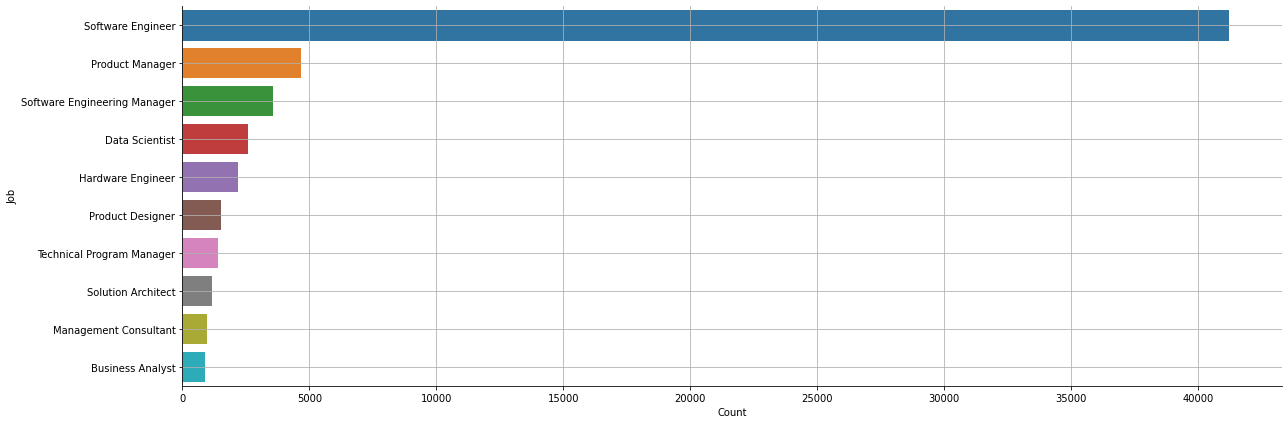

In [13]:
sns.catplot(x="Count", y="Job", kind="bar", data=job_title, height=6, aspect=3)
plt.grid(True)

In [14]:
new_df['company'].value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

# Top 8 Company Hiring

In [15]:
company_title = new_df["company"].value_counts()[0:8].reset_index()
company_title.columns = ["company", "Count"]
company_title

,company,Count
0,Amazon,8126
1,Microsoft,5216
2,Google,4330
3,Facebook,2990
4,Apple,2028
5,Oracle,1128
6,Salesforce,1056
7,Intel,949


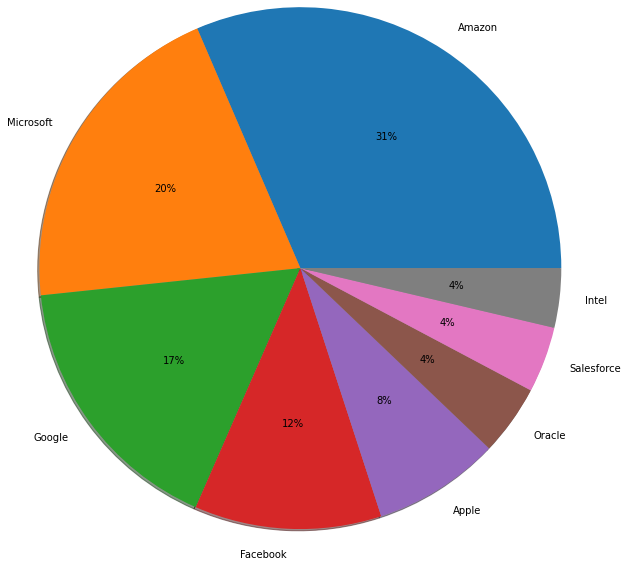

In [16]:
plt.pie(company_title['Count'],labels=company_title['company'], autopct='%.0f%%',radius=3,shadow=True)
plt.show()

In [17]:
new_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,0.245698,0.201223,0.028783,0.005108
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,0.430504,0.400917,0.167196,0.071291
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,1.000000,1.000000,1.000000,1.000000


# Salary Payslip Distribution

In [18]:
salary = []
salary.append({
    'type' : 'Base salary',
    'mean' : new_df['basesalary'].mean()
})
salary.append({
    'type' : 'Stock Value',
    'mean' : new_df['stockgrantvalue'].mean()
})
salary.append({
    'type' : 'Bonus',
    'mean' : new_df['bonus'].mean()
})
salary

[{'type': 'Base salary', 'mean': 136687.28129689346},
 {'type': 'Stock Value', 'mean': 51486.08073259315},
 {'type': 'Bonus', 'mean': 19334.746587752627}]

In [19]:
salary = pd.DataFrame(salary, columns = ['type','mean'])
salary

,type,mean
0,Base salary,136687.281297
1,Stock Value,51486.080733
2,Bonus,19334.746588


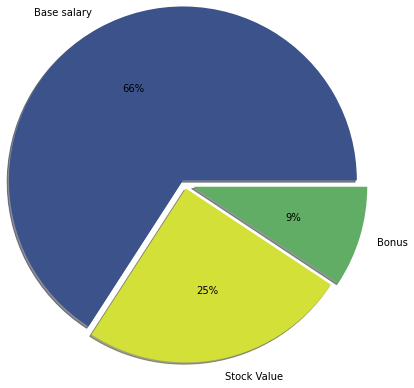

In [20]:
colors = ['#3b528b','#d2e038','#61ad66']
plt.pie(salary['mean'] , labels = salary['type'],autopct='%.0f%%' ,colors=colors, radius = 2 ,explode = (0.05,0.05, 0.1), shadow = True)
plt.show()

In [21]:
new_df['yearsofexperience'].value_counts().head(10)

5.0     5886
2.0     5530
3.0     5530
4.0     4896
10.0    4760
0.0     4603
1.0     4070
6.0     3990
8.0     3622
7.0     3451
Name: yearsofexperience, dtype: int64

In [22]:
new_df['old_company_yrs'] = new_df['yearsofexperience'] - new_df['yearsatcompany']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
new_df.head(10)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,old_company_yrs
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,NaN,0,0,0,0,0.0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0,2.0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,NaN,0,0,0,0,8.0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,NaN,0,0,0,0,2.0
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0,2.0
5,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,0.0,0.0,0.0,NaN,0,0,0,0,0.0
6,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,180000.0,65000.0,55000.0,NaN,0,0,0,0,4.0
7,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,135000.0,8000.0,13000.0,NaN,0,0,0,0,0.0
8,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,0.0,0.0,0.0,NaN,0,0,0,0,2.0
9,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.0,157000.0,26000.0,28000.0,NaN,0,0,0,0,6.0


# Old Company Vs Present Company years spend %

In [24]:
years = []
years.append({
    'year' : 'Present company - yrs in %',
    'value': new_df['yearsatcompany'].mean()
})
years.append({
    'year' : 'old Company - yrs in %',
    'value': new_df['old_company_yrs'].mean()
})
years

[{'year': 'Present company - yrs in %', 'value': 2.7020929408384147},
 {'year': 'old Company - yrs in %', 'value': 4.502042144248268}]

In [25]:
years = pd.DataFrame(years, columns = ['year','value'])
years['value']=years['value'].astype(float)

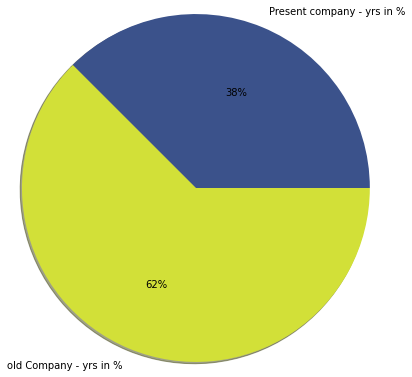

In [26]:
plt.pie(years['value'] , labels = years['year'],autopct='%.0f%%' ,colors=colors, radius = 2  ,shadow = True)
plt.show()

# Gender Distribution

In [27]:
raw_company_list = new_df["company"].value_counts()[0:20].reset_index()
company_list = raw_company_list['index'].values.tolist()
data = new_df[new_df['company'].isin(company_list)]


<AxesSubplot:xlabel='gender', ylabel='count'>

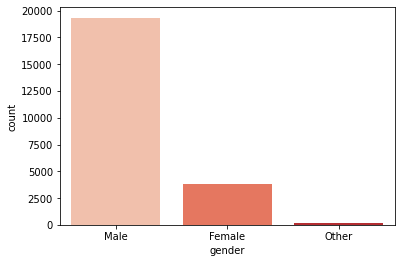

In [28]:
sns.countplot(data = data, x = 'gender', palette="Reds")

# Thank you !!
Please upvote if you liked my work !!